In [1]:
!pip3 install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('clinic-data.csv', delimiter=',')
df.head()

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


,x,y,client_age,clinick_distance,density_area,park_distance,vulnerable_group_density,social_infrastructure_rating
0,52.768865,30.466943,12,1,28,52,3,8
1,55.598649,14.103713,37,1,24,16,8,7
2,61.461549,27.727829,31,3,13,59,3,8
3,51.210678,9.913478,56,1,16,29,6,4
4,62.070864,15.297742,90,3,32,90,9,5


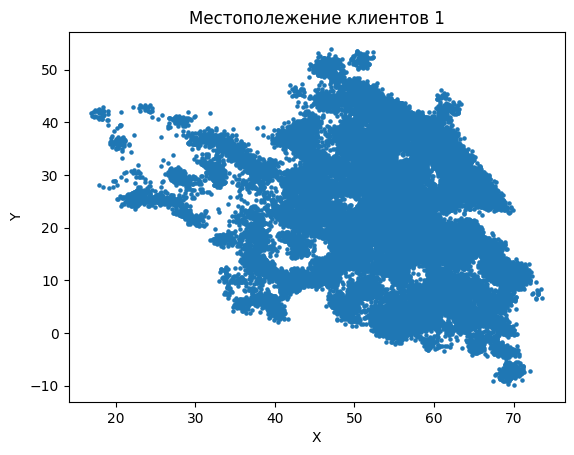

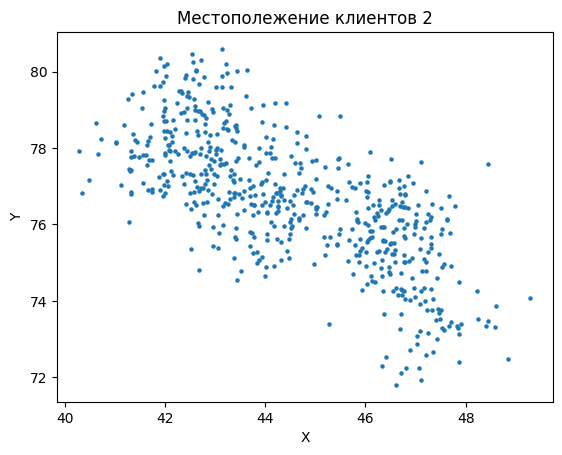

In [2]:
x1 = list()
y1 = list()
x2 = list()
y2 = list()
# print(len(df['y']))
for i in range(len(df['y'])):
    if df['y'].iloc[i]>60:
        y2.append(df['y'].iloc[i])
        x2.append(df['x'].iloc[i])
    else:
        y1.append(df['y'].iloc[i])
        x1.append(df['x'].iloc[i])


# print(x[:5])
# print('\n', y[:5])

plt.scatter(x1,y1,s=5)
plt.title("Местополежение клиентов 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.scatter(x2,y2,s=5)
plt.title("Местополежение клиентов 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [3]:
#для начала я бы сделал базовую кластеризацию K-means без учета параметров
# Кластеризация медотом K-means
!pip3 install scikit-learn
!pip3 install numpy
import numpy as np
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


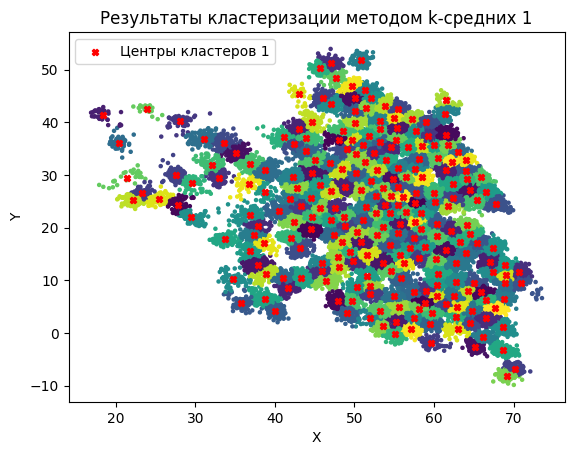

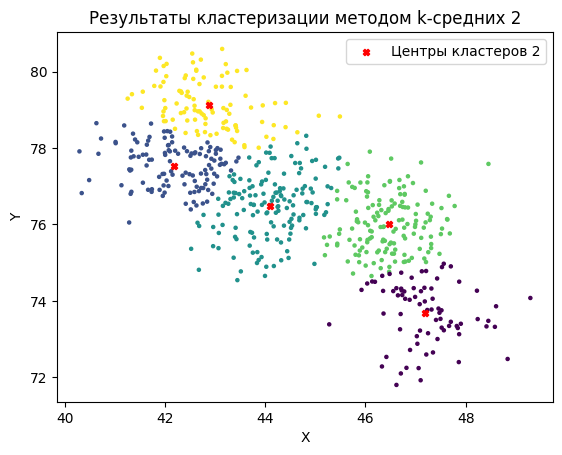

In [17]:
data1 = list()
data2 = list()
for i in range(len(x1)):
    data1.append([x1[i], y1[i]])
for i in range(len(x2)):
    data2.append([x2[i], y2[i]])
data1 = np.array(data1)
data2 = np.array(data2)

kmeans1 = KMeans(n_clusters=245, random_state=58, n_init=20)
kmeans1.fit(data1)

kmeans2 = KMeans(n_clusters=5, random_state=58, n_init=20)
kmeans2.fit(data2)

labels1 = kmeans1.labels_
centroids1 = kmeans1.cluster_centers_

labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

plt.scatter(data1[:, 0], data1[:, 1], c=labels1, s=5, cmap='viridis')
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=20, marker='X', label='Центры кластеров 1')
plt.title("Результаты кластеризации методом k-средних 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

plt.scatter(data2[:, 0], data2[:, 1], c=labels2, s=5, cmap='viridis')
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=20, marker='X', label='Центры кластеров 2')
plt.title("Результаты кластеризации методом k-средних 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [18]:
#посчитаю метрики для данного результата
#Total Travel Time
# data - x y клиента
# centroids - x y клиники
data = np.vstack((data1, data2))
centroids = np.vstack((centroids1, centroids2))

diff = data[:, None, :] - centroids[None, :, :] #broadcasting
dist = np.linalg.norm(diff, axis=2) #евклидово растояние
# min_dist = dist.min(axis=1)
nearest_building_idx = dist.argmin(axis=1) 

In [19]:
a = 0.05
b = 0.02

cost = a * dist + b * dist**2
min_cost_per_client = cost.min(axis=1)
ttt = min_cost_per_client.sum()
print(ttt)

2360.5935455609397


In [20]:
# посчитаю метрику Clinics Overload
K = np.bincount(nearest_building_idx) #фактическое количество клиентов, прикреплённых к клинике
L = 1000 #условный лимит на одну клинику иначе штраф
count_maximum = np.maximum(0, K-L)
CO = max(count_maximum)
print(CO)

0


In [ ]:
#сохраню самый базовый результат с методом Kmeans без учета дополнительных факторов(транспорт рядом/время до клиники и тд)
np.savetxt("Suetolog_23.12_version_1.csv", centroids, delimiter=",", fmt='%f', header='x,y',comments='')